In [1]:
'''import pandas as pd
import os
import numpy as np

# ============================================================
# 1. Locate the dataset folder
# ============================================================
to_combine_path = "/kaggle/input/nhanes/To Combine"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(to_combine_path) if f.lower().endswith(".csv")]
print(f"✅ Found {len(csv_files)} CSV files to combine.\n")

# ============================================================
# 2. Load each CSV safely
# ============================================================
dfs = []
for file in csv_files:
    path = os.path.join(to_combine_path, file)
    try:
        df = pd.read_csv(path, encoding="utf-8", low_memory=False)
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding="latin1", low_memory=False)
    dfs.append(df)
    print(f"   • Loaded {file:<30} → shape: {df.shape}")

# ============================================================
# 3. Identify the key column
# ============================================================
key_candidates = ["SEQN", "Respondent_ID", "Participant_ID"]
main_key = None
for cand in key_candidates:
    if any(cand in df.columns for df in dfs):
        main_key = cand
        break
if main_key is None:
    raise ValueError("❌ No common participant ID column found.")

print(f"\n✅ Using '{main_key}' as merge key.\n")

# ============================================================
# 4. Merge all CSVs
# ============================================================
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=main_key, how="outer")

print(f"✅ Combined dataset shape: {merged_df.shape}\n")

# ============================================================
# 5. Clean up column suffixes (.x/.y duplicates)
# ============================================================
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df.columns = merged_df.columns.str.replace(r"\.x$|\.y$", "", regex=True)

# ============================================================
# 6. Rename important columns (standardize)
# ============================================================
rename_map = {
    "RIDAGEMN": "Age_Months",
    "RIDAGEYR": "Age_Years",
    "RIAGENDR": "Gender",
    "RIDRETH3": "Ethnicity",
    "DMDBORN4": "Country_Birth",
    "INDHHIN2": "Household_Income",
    "WTINT2YR": "Interview_2yr_Weight",
    "SMQ040": "Currently_Smoker",
    "ALQ101": "Alcohol_Use_Last12mo",
    "PAQ605": "Vigorous_Activity",
    "PAQ620": "Moderate_Activity",
    "PAD615": "Walk_or_Bike",
    "DBQ700": "Diet_Quality_Score",
    "DR1TKCAL": "Calories_kcal_per_day",
    "DR1TPROT": "Protein_g_per_day",
    "DR1TCARB": "Carbohydrate_g_per_day",
    "DR1TSUGR": "Sugar_g_per_day",
    "DR1TTFAT": "Total_Fat_g_per_day",
    "DR1TSODI": "Sodium_mg_per_day",
    "BPXSY2": "Systolic_BP_Reading2",
    "BPXSY3": "Systolic_BP_Reading3",
    "BPXDI2": "Diastolic_BP_Reading2",
    "BPXDI3": "Diastolic_BP_Reading3",
    "BPQ020": "Diagnosed_Hypertension",
    "BMXWT": "Weight_kg",
    "BMXHT": "Height_cm",
    "BMXARMC": "Arm_Circumference_cm",
    "BMXWAIST": "Waist_cm",
    "BMXLEG": "Leg_Measure_cm"
}
merged_df.rename(columns=rename_map, inplace=True)

# ============================================================
# 7. Compute mean systolic & diastolic BP
# ============================================================
merged_df["Systolic_BP"] = merged_df[
    ["Systolic_BP_Reading2", "Systolic_BP_Reading3"]
].mean(axis=1, skipna=True)

merged_df["Diastolic_BP"] = merged_df[
    ["Diastolic_BP_Reading2", "Diastolic_BP_Reading3"]
].mean(axis=1, skipna=True)

# ============================================================
# 8. Final column selection (optional)
# ============================================================
keep_cols = [
    "Participant_ID" if "Participant_ID" in merged_df.columns else main_key,
    "Age_Months", "Age_Years", "Gender", "Ethnicity",
    "Weight_kg", "Height_cm", "Waist_cm", "Arm_Circumference_cm", "Leg_Measure_cm",
    "Household_Income", "Interview_2yr_Weight",
    "Currently_Smoker", "Alcohol_Use_Last12mo",
    "Vigorous_Activity", "Moderate_Activity", "Walk_or_Bike",
    "Diet_Quality_Score", "Calories_kcal_per_day", "Protein_g_per_day",
    "Carbohydrate_g_per_day", "Sugar_g_per_day", "Total_Fat_g_per_day",
    "Sodium_mg_per_day", "Diagnosed_Hypertension",
    "Systolic_BP", "Diastolic_BP",
]
final_cols = [c for c in keep_cols if c in merged_df.columns]
final_df = merged_df[final_cols].copy()

# ============================================================
# 9. Save cleaned dataset
# ============================================================
output_path = "/kaggle/working/nhanes_cleaned.csv"
final_df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved to: {output_path}")
print(f"✅ Final shape: {final_df.shape}\n")

# ============================================================
# 10. Display column summary
# ============================================================
for i, col in enumerate(final_df.columns[:50], 1):
    print(f"{i:03d}. {col}")
if len(final_df.columns) > 50:
    print(f"... ({len(final_df.columns)} total columns)")'''


'import pandas as pd\nimport os\nimport numpy as np\n\n# ============================================================\n# 1. Locate the dataset folder\n# ============================================================\nto_combine_path = "/kaggle/input/nhanes/To Combine"\n\n# List all CSV files in the folder\ncsv_files = [f for f in os.listdir(to_combine_path) if f.lower().endswith(".csv")]\nprint(f"✅ Found {len(csv_files)} CSV files to combine.\n")\n\n# ============================================================\n# 2. Load each CSV safely\n# ============================================================\ndfs = []\nfor file in csv_files:\n    path = os.path.join(to_combine_path, file)\n    try:\n        df = pd.read_csv(path, encoding="utf-8", low_memory=False)\n    except UnicodeDecodeError:\n        df = pd.read_csv(path, encoding="latin1", low_memory=False)\n    dfs.append(df)\n    print(f"   • Loaded {file:<30} → shape: {df.shape}")\n\n# ==================================================

In [2]:
'''import pandas as pd

# -----------------------------
# Load datasets
# -----------------------------
dataset1 = pd.read_csv('/kaggle/input/nhanes-cleaned-1/nhanes_cleaned.csv')
dataset2 = pd.read_excel('/kaggle/input/dataset2/Dataset_Health.xlsx')

# -----------------------------
# Preprocess dataset2
# -----------------------------
# Round Age and convert to int
dataset2['Age'] = dataset2['Age'].round().astype(int)

# Drop invalid ages (<= 0)
dataset2 = dataset2[dataset2['Age'] > 0]

# Identify relevant columns
steps_cols = [col for col in dataset2.columns if 'Steps' in col]
hr_cols = [col for col in dataset2.columns if 'HeartRate' in col]
sleep_cols = [col for col in dataset2.columns if 'SleepDuration' in col]
num_cols = steps_cols + hr_cols + sleep_cols + ['Weight', 'Height']

# Convert numeric columns properly
dataset2[num_cols] = dataset2[num_cols].apply(pd.to_numeric, errors='coerce')

# -----------------------------
# Aggregate dataset2 by Age
# -----------------------------
dataset2_agg = dataset2.groupby('Age').agg(
    Weight=('Weight', 'mean'),
    Height=('Height', 'mean')
).reset_index()

# Calculate averages for 30-day metrics
dataset2_agg['Steps_Avg'] = dataset2.groupby('Age')[steps_cols].mean().mean(axis=1).values
dataset2_agg['HeartRate_Avg'] = dataset2.groupby('Age')[hr_cols].mean().mean(axis=1).values
dataset2_agg['SleepDuration_Avg'] = dataset2.groupby('Age')[sleep_cols].mean().mean(axis=1).values

# -----------------------------
# Merge with NHANES dataset
# -----------------------------
merged_df = pd.merge(dataset1, dataset2_agg, on='Age', how='outer')
merged_df.reset_index(drop=True, inplace=True)

# -----------------------------
# Remove records with Age < 5
# -----------------------------
merged_df = merged_df[merged_df['Age'] >= 5]

# -----------------------------
# Identify and display empty columns
# -----------------------------
empty_cols = merged_df.columns[merged_df.isna().all()].tolist()
if empty_cols:
    print("Columns entirely empty (all NaN):")
    print(empty_cols)
else:
    print("No entirely empty columns found.")

# -----------------------------
# Save merged dataset
# -----------------------------
merged_df.to_csv('merged_dataset.csv', index=False)
print("Merge completed. Dataset saved as 'merged_dataset.csv'.")
print(f"Final dataset shape: {merged_df.shape}")'''


'import pandas as pd\n\n# -----------------------------\n# Load datasets\n# -----------------------------\ndataset1 = pd.read_csv(\'/kaggle/input/nhanes-cleaned-1/nhanes_cleaned.csv\')\ndataset2 = pd.read_excel(\'/kaggle/input/dataset2/Dataset_Health.xlsx\')\n\n# -----------------------------\n# Preprocess dataset2\n# -----------------------------\n# Round Age and convert to int\ndataset2[\'Age\'] = dataset2[\'Age\'].round().astype(int)\n\n# Drop invalid ages (<= 0)\ndataset2 = dataset2[dataset2[\'Age\'] > 0]\n\n# Identify relevant columns\nsteps_cols = [col for col in dataset2.columns if \'Steps\' in col]\nhr_cols = [col for col in dataset2.columns if \'HeartRate\' in col]\nsleep_cols = [col for col in dataset2.columns if \'SleepDuration\' in col]\nnum_cols = steps_cols + hr_cols + sleep_cols + [\'Weight\', \'Height\']\n\n# Convert numeric columns properly\ndataset2[num_cols] = dataset2[num_cols].apply(pd.to_numeric, errors=\'coerce\')\n\n# -----------------------------\n# Aggregate d

In [3]:
'''import pandas as pd

# -----------------------------
# Step 1: Load both datasets
# -----------------------------
dataset1 = pd.read_csv('/kaggle/input/merged-nhanes-and-health/merged nhanes and health.csv', low_memory=True)
dataset2 = pd.read_csv('/kaggle/input/demographic-data/demographic_data.csv', low_memory=True)

# -----------------------------
# Step 2: Standardize Gender
# -----------------------------
gender_map = {'Male': 1, 'M': 1, 'male': 1, 'm': 1,
              'Female': 2, 'F': 2, 'female': 2, 'f': 2}
dataset2['Gender'] = dataset2['Gender'].map(gender_map)

# -----------------------------
# Step 3: Drop unnecessary columns
# -----------------------------
cols_to_drop = ['Name', 'Country', 'Income', 'Education Level', 'Credit Score']
dataset2.drop(columns=[c for c in cols_to_drop if c in dataset2.columns], inplace=True, errors='ignore')

# -----------------------------
# Step 4: Clean Age
# -----------------------------
dataset1['Age'] = pd.to_numeric(dataset1['Age'], errors='coerce').fillna(0).astype(int)
dataset2['Age'] = pd.to_numeric(dataset2['Age'], errors='coerce').fillna(0).astype(int)

# Drop invalid ages
dataset1 = dataset1[dataset1['Age'] > 0]
dataset2 = dataset2[dataset2['Age'] > 0]

# -----------------------------
# Step 5: Aggregate dataset2 to avoid duplication explosion
# -----------------------------
dataset2_agg = dataset2.groupby(['Age', 'Gender']).mean(numeric_only=True).reset_index()

# -----------------------------
# Step 6: Outer join safely
# -----------------------------
merged_dataset = pd.merge(dataset1, dataset2_agg, on=['Age', 'Gender'], how='outer')

# -----------------------------
# Step 7: Identify and display empty columns
# -----------------------------
empty_columns = merged_dataset.columns[merged_dataset.isna().all()].tolist()

if empty_columns:
    print("\n⚠️ Columns that are completely empty:")
    for col in empty_columns:
        print(f"- {col}")
else:
    print("\n✅ No completely empty columns found.")

# -----------------------------
# Step 8: Save the merged dataset
# -----------------------------
merged_dataset.to_csv('combined_dataset.csv', index=False)
print("\n✅ Combined dataset saved as 'combined_dataset.csv'")
print("Final shape:", merged_dataset.shape)'''


'import pandas as pd\n\n# -----------------------------\n# Step 1: Load both datasets\n# -----------------------------\ndataset1 = pd.read_csv(\'/kaggle/input/merged-nhanes-and-health/merged nhanes and health.csv\', low_memory=True)\ndataset2 = pd.read_csv(\'/kaggle/input/demographic-data/demographic_data.csv\', low_memory=True)\n\n# -----------------------------\n# Step 2: Standardize Gender\n# -----------------------------\ngender_map = {\'Male\': 1, \'M\': 1, \'male\': 1, \'m\': 1,\n              \'Female\': 2, \'F\': 2, \'female\': 2, \'f\': 2}\ndataset2[\'Gender\'] = dataset2[\'Gender\'].map(gender_map)\n\n# -----------------------------\n# Step 3: Drop unnecessary columns\n# -----------------------------\ncols_to_drop = [\'Name\', \'Country\', \'Income\', \'Education Level\', \'Credit Score\']\ndataset2.drop(columns=[c for c in cols_to_drop if c in dataset2.columns], inplace=True, errors=\'ignore\')\n\n# -----------------------------\n# Step 4: Clean Age\n# ----------------------

In [4]:
'''import pandas as pd

# -----------------------------
# Step 1: Load both datasets
# -----------------------------
d1 = pd.read_csv('/kaggle/input/nhd-dataset/nhd_merged.csv', low_memory=True)
d2 = pd.read_csv('/kaggle/input/health/health_activity_data.csv', low_memory=True)

# -----------------------------
# Step 2: Standardize Gender in d2
# -----------------------------
gender_map = {'Male': 1, 'M': 1, 'male': 1, 'm': 1,
              'Female': 2, 'F': 2, 'female': 2, 'f': 2}
d2['Gender'] = d2['Gender'].map(gender_map)

# -----------------------------
# Step 3: Clean Age columns
# -----------------------------
d1['Age'] = pd.to_numeric(d1['Age'], errors='coerce').fillna(0).astype(int)
d2['Age'] = pd.to_numeric(d2['Age'], errors='coerce').fillna(0).astype(int)

# Drop invalid ages (e.g., negative or zero)
d1 = d1[d1['Age'] > 0]
d2 = d2[d2['Age'] > 0]

# -----------------------------
# Step 4: Handle duplicate rows in d2 (optional aggregation)
# -----------------------------
# If multiple entries exist for same (Age, Gender), average numeric columns
d2_agg = d2.groupby(['Age', 'Gender']).mean(numeric_only=True).reset_index()

# -----------------------------
# Step 5: Outer Join
# -----------------------------
merged_df = pd.merge(d1, d2_agg, on=['Age', 'Gender'], how='outer')

# -----------------------------
# Step 6: Identify completely empty columns
# -----------------------------
empty_cols = merged_df.columns[merged_df.isna().all()].tolist()
if empty_cols:
    print("\n⚠️ Columns completely empty after merge:")
    for col in empty_cols:
        print(f"- {col}")
else:
    print("\n✅ No completely empty columns found.")

# -----------------------------
# Step 7: Save Final Merged Dataset
# -----------------------------
merged_df.to_csv('merged_d1_d2.csv', index=False)
print("\n✅ Merged dataset saved as 'merged_d1_d2.csv'")
print("Final shape:", merged_df.shape)'''


'import pandas as pd\n\n# -----------------------------\n# Step 1: Load both datasets\n# -----------------------------\nd1 = pd.read_csv(\'/kaggle/input/nhd-dataset/nhd_merged.csv\', low_memory=True)\nd2 = pd.read_csv(\'/kaggle/input/health/health_activity_data.csv\', low_memory=True)\n\n# -----------------------------\n# Step 2: Standardize Gender in d2\n# -----------------------------\ngender_map = {\'Male\': 1, \'M\': 1, \'male\': 1, \'m\': 1,\n              \'Female\': 2, \'F\': 2, \'female\': 2, \'f\': 2}\nd2[\'Gender\'] = d2[\'Gender\'].map(gender_map)\n\n# -----------------------------\n# Step 3: Clean Age columns\n# -----------------------------\nd1[\'Age\'] = pd.to_numeric(d1[\'Age\'], errors=\'coerce\').fillna(0).astype(int)\nd2[\'Age\'] = pd.to_numeric(d2[\'Age\'], errors=\'coerce\').fillna(0).astype(int)\n\n# Drop invalid ages (e.g., negative or zero)\nd1 = d1[d1[\'Age\'] > 0]\nd2 = d2[d2[\'Age\'] > 0]\n\n# -----------------------------\n# Step 4: Handle duplicate rows in d

In [5]:
''''import os
import shutil

working_dir = "/kaggle/working/"

# Loop through all files and folders inside the working directory
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.remove(item_path)  # delete file or symlink
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # delete folder recursively
        print(f"✅ Deleted: {item_path}")
    except Exception as e:
        print(f"⚠️ Could not delete {item_path}: {e}")

print("\n✅ All files cleared from /kaggle/working/")'''


'\'import os\nimport shutil\n\nworking_dir = "/kaggle/working/"\n\n# Loop through all files and folders inside the working directory\nfor item in os.listdir(working_dir):\n    item_path = os.path.join(working_dir, item)\n    try:\n        if os.path.isfile(item_path) or os.path.islink(item_path):\n            os.remove(item_path)  # delete file or symlink\n        elif os.path.isdir(item_path):\n            shutil.rmtree(item_path)  # delete folder recursively\n        print(f"✅ Deleted: {item_path}")\n    except Exception as e:\n        print(f"⚠️ Could not delete {item_path}: {e}")\n\nprint("\n✅ All files cleared from /kaggle/working/")'

**FOR NAIL IMAGES**

In [6]:
!pip uninstall -y keras tensorflow keras-core
!pip install tensorflow==2.15.0 keras==2.15.0 tensorflow-addons==0.22.0 --force-reinstall

Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras-core 0.1.7
Uninstalling keras-core-0.1.7:
  Successfully uninstalled keras-core-0.1.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 78.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.2 MB/s eta 0:00:

In [7]:
"""# ===============================
# Imports & Config
# ===============================
import os, time, math, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import EfficientNetB1, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import AdamW
from keras import regularizers, mixed_precision
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# ===============================
# Logging & Seeds
# ===============================
mixed_precision.set_global_policy('float32')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
np.random.seed(42)
tf.random.set_seed(42)

start_time = time.time()
print("[INFO] Starting training pipeline...")
print(f"[INFO] TensorFlow version: {tf.__version__}")
import keras
print(f"[INFO] Keras version: {keras.__version__}")

# ===============================
# Paths & Hyperparameters
# ===============================
train_dir = '/kaggle/input/nail-disease-image-classification-dataset/nail_disease_dataset/train'
test_dir = '/kaggle/input/nail-disease-image-classification-dataset/nail_disease_dataset/test'
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 15
FINE_TUNE_EPOCHS = 25
INIT_LR = 3e-5
FT_LR = 5e-5
MIXUP_ALPHA = 0.4
NUM_FOLDS = 5

# ===============================
# Data Generators
# ===============================
train_datagen_base = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=10,
    horizontal_flip=True,
    channel_shift_range=20,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32))
)

def mixup_generator(generator, alpha=MIXUP_ALPHA):
    while True:
        x, y = next(generator)
        lam = np.random.beta(alpha, alpha)
        index = np.random.permutation(len(x))
        x_mix = lam * x + (1 - lam) * x[index]
        y_mix = lam * y + (1 - lam) * y[index]
        yield x_mix, y_mix

# ===============================
# Model Definition
# ===============================
def build_model(num_classes, dropout_high=0.4):
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3))
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = Dropout(dropout_high)(x)
    x = Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = Dropout(dropout_high/1.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    optimizer = AdamW(learning_rate=INIT_LR, weight_decay=1e-4, clipnorm=1.0)
    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )
    return model, base_model

# ===============================
# Fine-tuning helpers
# ===============================
def unfreeze_last_n_layers(base_model, n):
    for layer in base_model.layers[-n:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
    return base_model

def progressive_unfreeze(model, base_model, stages, train_gen, val_gen, steps_train, steps_val, class_weights):
    for n in stages:
        print(f"\n[INFO] Unfreezing last {n} layers for fine-tuning...")
        unfreeze_last_n_layers(base_model, n)
        model.compile(
            optimizer=AdamW(learning_rate=FT_LR, weight_decay=1e-4, clipnorm=1.0),
            loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
            metrics=['accuracy']
        )
        model.fit(
            train_gen,
            validation_data=val_gen,
            epochs=5,
            steps_per_epoch=steps_train,
            validation_steps=steps_val,
            class_weight=class_weights,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                LearningRateScheduler(cosine_annealing)
            ],
            verbose=1
        )

# ===============================
# Cosine LR Scheduler
# ===============================
def cosine_annealing(epoch):
    max_lr, min_lr, T_max = FT_LR, 1e-6, FINE_TUNE_EPOCHS
    lr = min_lr + 0.5 * (max_lr - min_lr) * (1 + np.cos(np.pi * epoch / T_max))
    print(f"[INFO] Epoch {epoch+1}: learning rate = {lr:.8f}")
    return lr

# ===============================
# Cross Validation Training
# ===============================
all_files, all_labels = [], []
class_indices = train_datagen_base.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training', shuffle=False
).class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

for class_name, idx in class_indices.items():
    class_dir = os.path.join(train_dir, class_name)
    for f in os.listdir(class_dir):
        all_files.append(os.path.join(class_dir, f))
        all_labels.append(idx)

all_files, all_labels = np.array(all_files), np.array(all_labels)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(all_labels), y=all_labels)
class_weights = dict(enumerate(class_weights))

skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)
fold_histories, fold_val_accuracies = [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(all_files, all_labels)):
    print(f"\n[INFO] Starting fold {fold+1}/{NUM_FOLDS}...")
    train_files, val_files = all_files[train_idx], all_files[val_idx]
    train_labels, val_labels = all_labels[train_idx], all_labels[val_idx]

    # Generators
    train_generator = ImageDataGenerator(
        preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
        rotation_range=20, width_shift_range=0.15, height_shift_range=0.15,
        zoom_range=0.2, brightness_range=[0.8, 1.2],
        shear_range=10, horizontal_flip=True, channel_shift_range=20, fill_mode='nearest'
    ).flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': train_files, 'class': [idx_to_class[label] for label in train_labels]}),
        x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True
    )

    val_generator = ImageDataGenerator(
        preprocessing_function=lambda x: preprocess_input(x.astype(np.float32))
    ).flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': val_files, 'class': [idx_to_class[label] for label in val_labels]}),
        x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
    )

    train_generator_mixup = mixup_generator(train_generator)

    # Build model
    model, base_model = build_model(num_classes=len(class_indices))

    # Base training
    steps_train = math.ceil(len(train_files) / BATCH_SIZE)
    steps_val = math.ceil(len(val_files) / BATCH_SIZE)

    history = model.fit(
        train_generator_mixup,
        validation_data=val_generator,
        epochs=EPOCHS,
        steps_per_epoch=steps_train,
        validation_steps=steps_val,
        class_weight=class_weights,
        verbose=1
    )

    # Progressive fine-tuning
    progressive_unfreeze(model, base_model, stages=[10, 20, 40],
                         train_gen=train_generator_mixup,
                         val_gen=val_generator,
                         steps_train=steps_train,
                         steps_val=steps_val,
                         class_weights=class_weights)

    fold_histories.append(history)
    val_acc = max(history.history['val_accuracy'])
    fold_val_accuracies.append(val_acc)

# ===============================
# Visualization
# ===============================
plt.figure(figsize=(12, 5))
plt.plot(fold_histories[-1].history['accuracy'], label='Train Acc')
plt.plot(fold_histories[-1].history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ===============================
# Confusion Matrix (Last Fold)
# ===============================
val_preds = model.predict(val_generator, steps=steps_val, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_labels[:len(y_pred)]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Last Fold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_true, y_pred))
"""

'# ===============================\n# Imports & Config\n# ===============================\nimport os, time, math, numpy as np, matplotlib.pyplot as plt, seaborn as sns\nimport pandas as pd\nimport tensorflow as tf\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.applications.efficientnet import EfficientNetB1, preprocess_input\nfrom keras.layers import Dense, GlobalAveragePooling2D, Dropout\nfrom keras.models import Model\nfrom keras.optimizers import AdamW\nfrom keras import regularizers, mixed_precision\nfrom keras.callbacks import EarlyStopping, LearningRateScheduler\nfrom sklearn.utils import class_weight\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom sklearn.model_selection import StratifiedKFold\n\n# ===============================\n# Logging & Seeds\n# ===============================\nmixed_precision.set_global_policy(\'float32\')\nos.environ[\'TF_CPP_MIN_LOG_LEVEL\'] = \'2\'\nnp.random.seed(42)\ntf.random.set_seed(42)\n\nstart_ti

2025-10-20 22:05:21.127707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-20 22:05:21.127803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-20 22:05:21.129544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[INFO] Starting training pipeline...
[INFO] TensorFlow version: 2.15.0
[INFO] Keras version: 2.15.0
Found 933 images belonging to 3 classes.
[INFO] Updated class weights: {0: 1.5658602150537635, 1: 0.6753623188405797, 2: 1.3625730994152048}

[INFO] Starting fold 1/5...
Found 931 validated image filenames belonging to 3 classes.
Found 233 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


27018416/27018416 [==============================] - 1s 0us/step
Epoch 1/15
59/59 [==============================] - 62s 895ms/step - loss: 1.2452 - accuracy: 0.4898 - val_loss: 1.0499 - val_accuracy: 0.7167
Epoch 2/15
59/59 [==============================] - 49s 831ms/step - loss: 1.0950 - accuracy: 0.6563 - val_loss: 0.9228 - val_accuracy: 0.7768
Epoch 3/15
59/59 [==============================] - 49s 828ms/step - loss: 1.0045 - accuracy: 0.7100 - val_loss: 0.8503 - val_accuracy: 0.8069
Epoch 4/15
59/59 [==============================] - 48s 817ms/step - loss: 0.9626 - accuracy: 0.7465 - val_loss: 0.8140 - val_accuracy: 0.7940
Epoch 5/15
59/59 [==============================] - 49s 841ms/step - loss: 0.9368 - accuracy: 0.7583 - val_loss: 0.7888 - val_accuracy: 0.7768
Epoch 6/15
59/59 [==============================] - 47s 794ms/step - loss: 0.9189 - accuracy: 0.7830 - val_loss: 0.7745 - val_accuracy: 0.7854
Epoch 7/15
59/59 [==============================] - 46s 783ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/15
59/59 [==============================] - 58s 850ms/step - loss: 1.1989 - accuracy: 0.4962 - val_loss: 1.0010 - val_accuracy: 0.7339
Epoch 2/15
59/59 [==============================] - 47s 794ms/step - loss: 1.0644 - accuracy: 0.6563 - val_loss: 0.9001 - val_accuracy: 0.7940
Epoch 3/15
59/59 [==============================] - 50s 845ms/step - loss: 1.0017 - accuracy: 0.7154 - val_loss: 0.8274 - val_accuracy: 0.8412
Epoch 4/15
59/59 [==============================] - 47s 794ms/step - loss: 0.9607 - accuracy: 0.7379 - val_loss: 0.7878 - val_accuracy: 0.8369
Epoch 5/15
59/59 [==============================] - 47s 794ms/step - loss: 0.9335 - accuracy: 0.7325 - val_loss: 0.7521 - val_accuracy: 0.8584
Epoch 6/15
59/59 [==============================] - 46s 782ms/step - loss: 0.8960 - accuracy: 0.7712 - val_loss: 0.7133 - val_accuracy: 0.8884
Epoch 7/15
59/59 [==============================] - 48s 816ms/step - loss: 0.9120 - accuracy: 0.7648 - val_loss: 0.7114 - val_accuracy: 0.8627

/usr/local/lib/python3.11/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/15
59/59 [==============================] - 57s 829ms/step - loss: 1.2226 - accuracy: 0.4946 - val_loss: 1.0479 - val_accuracy: 0.6422
Epoch 2/15
59/59 [==============================] - 46s 787ms/step - loss: 1.0958 - accuracy: 0.6223 - val_loss: 0.9255 - val_accuracy: 0.7845
Epoch 3/15
59/59 [==============================] - 45s 771ms/step - loss: 1.0012 - accuracy: 0.7092 - val_loss: 0.8641 - val_accuracy: 0.7931
Epoch 4/15
59/59 [==============================] - 45s 769ms/step - loss: 0.9664 - accuracy: 0.7200 - val_loss: 0.8153 - val_accuracy: 0.8060
Epoch 5/15
59/59 [==============================] - 48s 809ms/step - loss: 0.9382 - accuracy: 0.7511 - val_loss: 0.7714 - val_accuracy: 0.8448
Epoch 6/15
59/59 [==============================] - 46s 781ms/step - loss: 0.9134 - accuracy: 0.7747 - val_loss: 0.7594 - val_accuracy: 0.8147
Epoch 7/15
59/59 [==============================] - 45s 768ms/step - loss: 0.9131 - accuracy: 0.7704 - val_loss: 0.7367 - val_accuracy: 0.8405

/usr/local/lib/python3.11/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/15
59/59 [==============================] - 59s 867ms/step - loss: 1.2092 - accuracy: 0.4984 - val_loss: 1.0299 - val_accuracy: 0.6567
Epoch 2/15
59/59 [==============================] - 49s 838ms/step - loss: 1.0685 - accuracy: 0.6595 - val_loss: 0.9281 - val_accuracy: 0.7296
Epoch 3/15
59/59 [==============================] - 47s 806ms/step - loss: 1.0003 - accuracy: 0.7164 - val_loss: 0.8675 - val_accuracy: 0.7511
Epoch 4/15
59/59 [==============================] - 48s 812ms/step - loss: 0.9634 - accuracy: 0.7465 - val_loss: 0.8291 - val_accuracy: 0.7425
Epoch 5/15
59/59 [==============================] - 48s 809ms/step - loss: 0.9272 - accuracy: 0.7615 - val_loss: 0.7975 - val_accuracy: 0.7682
Epoch 6/15
59/59 [==============================] - 48s 807ms/step - loss: 0.9002 - accuracy: 0.7863 - val_loss: 0.7835 - val_accuracy: 0.7639
Epoch 7/15
59/59 [==============================] - 45s 770ms/step - loss: 0.8596 - accuracy: 0.8013 - val_loss: 0.7783 - val_accuracy: 0.7597

/usr/local/lib/python3.11/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/15
59/59 [==============================] - 60s 889ms/step - loss: 1.2354 - accuracy: 0.5016 - val_loss: 1.0504 - val_accuracy: 0.6996
Epoch 2/15
59/59 [==============================] - 46s 778ms/step - loss: 1.1051 - accuracy: 0.6112 - val_loss: 0.9456 - val_accuracy: 0.7210
Epoch 3/15
59/59 [==============================] - 43s 735ms/step - loss: 1.0176 - accuracy: 0.6960 - val_loss: 0.8806 - val_accuracy: 0.7339
Epoch 4/15
59/59 [==============================] - 49s 837ms/step - loss: 0.9698 - accuracy: 0.7325 - val_loss: 0.8160 - val_accuracy: 0.7597
Epoch 5/15
59/59 [==============================] - 49s 828ms/step - loss: 0.9399 - accuracy: 0.7615 - val_loss: 0.8113 - val_accuracy: 0.7382
Epoch 6/15
59/59 [==============================] - 49s 838ms/step - loss: 0.9217 - accuracy: 0.7540 - val_loss: 0.7828 - val_accuracy: 0.7597
Epoch 7/15
59/59 [==============================] - 47s 793ms/step - loss: 0.9081 - accuracy: 0.7798 - val_loss: 0.7443 - val_accuracy: 0.7854

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO] Saved full model and weights.


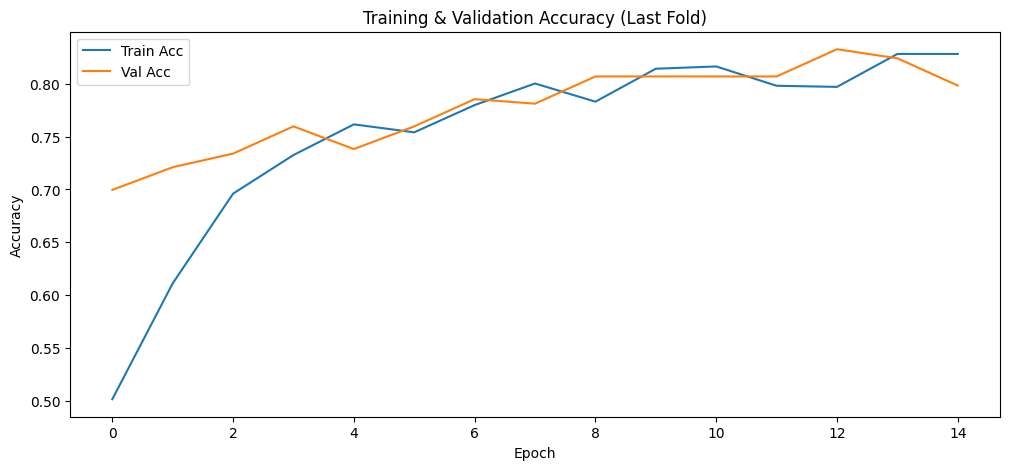

15/15 [==============================] - 10s 562ms/step


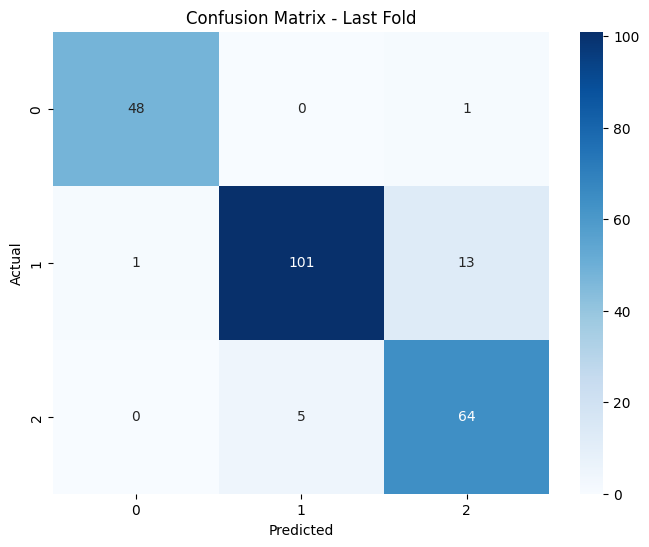

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.95      0.88      0.91       115
           2       0.82      0.93      0.87        69

    accuracy                           0.91       233
   macro avg       0.92      0.93      0.92       233
weighted avg       0.92      0.91      0.91       233



In [8]:
# ===============================
# Imports & Config
# ===============================
import os, time, math, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import EfficientNetB1, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import AdamW
from keras import regularizers, mixed_precision
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# ===============================
# Logging & Seeds
# ===============================
mixed_precision.set_global_policy('float32')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
np.random.seed(42)
tf.random.set_seed(42)

start_time = time.time()
print("[INFO] Starting training pipeline...")
print(f"[INFO] TensorFlow version: {tf.__version__}")
import keras
print(f"[INFO] Keras version: {keras.__version__}")

# ===============================
# Paths & Hyperparameters
# ===============================
train_dir = '/kaggle/input/nail-disease-image-classification-dataset/nail_disease_dataset/train'
test_dir = '/kaggle/input/nail-disease-image-classification-dataset/nail_disease_dataset/test'
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 15
FINE_TUNE_EPOCHS = 25
INIT_LR = 3e-5
FT_LR = 5e-5
FT_LR_CLASS2 = 3e-5  # Lower LR for fine-tuning
MIXUP_ALPHA = 0.4
NUM_FOLDS = 5

# ===============================
# Data Generators
# ===============================
train_datagen_base = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=10,
    horizontal_flip=True,
    channel_shift_range=20,
    fill_mode='nearest',
    validation_split=0.2
)

# Stronger augmentation for Class 2
train_datagen_class2 = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    shear_range=15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: preprocess_input(x.astype(np.float32))
)

def mixup_generator(generator, alpha=MIXUP_ALPHA):
    while True:
        x, y = next(generator)
        lam = np.random.beta(alpha, alpha)
        index = np.random.permutation(len(x))
        x_mix = lam * x + (1 - lam) * x[index]
        y_mix = lam * y + (1 - lam) * y[index]
        yield x_mix, y_mix

# ===============================
# Model Definition
# ===============================
def build_model(num_classes, dropout_high=0.4):
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3))
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = Dropout(dropout_high)(x)
    x = Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = Dropout(dropout_high/1.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    optimizer = AdamW(learning_rate=INIT_LR, weight_decay=1e-4, clipnorm=1.0)
    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )
    return model, base_model

# ===============================
# Fine-tuning helpers
# ===============================
def unfreeze_last_n_layers(base_model, n):
    for layer in base_model.layers[-n:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
    return base_model

def progressive_unfreeze(model, base_model, stages, train_gen, val_gen, steps_train, steps_val, class_weights):
    for n in stages:
        print(f"\n[INFO] Unfreezing last {n} layers for fine-tuning...")
        unfreeze_last_n_layers(base_model, n)
        optimizer = AdamW(learning_rate=FT_LR_CLASS2, weight_decay=1e-4, clipnorm=1.0)
        model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
            metrics=['accuracy']
        )
        model.fit(
            train_gen,
            validation_data=val_gen,
            epochs=5,
            steps_per_epoch=steps_train,
            validation_steps=steps_val,
            class_weight=class_weights,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                LearningRateScheduler(cosine_annealing)
            ],
            verbose=1
        )

# ===============================
# Cosine LR Scheduler
# ===============================
def cosine_annealing(epoch):
    max_lr, min_lr, T_max = FT_LR_CLASS2, 1e-6, FINE_TUNE_EPOCHS
    lr = min_lr + 0.5 * (max_lr - min_lr) * (1 + np.cos(np.pi * epoch / T_max))
    print(f"[INFO] Epoch {epoch+1}: learning rate = {lr:.8f}")
    return lr

# ===============================
# Cross Validation Training
# ===============================
all_files, all_labels = [], []
class_indices = train_datagen_base.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training', shuffle=False
).class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

for class_name, idx in class_indices.items():
    class_dir = os.path.join(train_dir, class_name)
    for f in os.listdir(class_dir):
        all_files.append(os.path.join(class_dir, f))
        all_labels.append(idx)

all_files, all_labels = np.array(all_files), np.array(all_labels)
class_weights = dict(enumerate(class_weight.compute_class_weight(
    'balanced', classes=np.unique(all_labels), y=all_labels
)))

# Boost Class 2
class_weights[2] *= 1.2
print("[INFO] Updated class weights:", class_weights)

skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)
fold_histories, fold_val_accuracies = [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(all_files, all_labels)):
    print(f"\n[INFO] Starting fold {fold+1}/{NUM_FOLDS}...")
    train_files, val_files = all_files[train_idx], all_files[val_idx]
    train_labels, val_labels = all_labels[train_idx], all_labels[val_idx]

    # Generators
    train_generator = ImageDataGenerator(
        preprocessing_function=lambda x: preprocess_input(x.astype(np.float32)),
        rotation_range=20, width_shift_range=0.15, height_shift_range=0.15,
        zoom_range=0.2, brightness_range=[0.8, 1.2],
        shear_range=10, horizontal_flip=True, channel_shift_range=20, fill_mode='nearest'
    ).flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': train_files, 'class': [idx_to_class[label] for label in train_labels]}),
        x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True
    )

    val_generator = ImageDataGenerator(
        preprocessing_function=lambda x: preprocess_input(x.astype(np.float32))
    ).flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': val_files, 'class': [idx_to_class[label] for label in val_labels]}),
        x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
    )

    train_generator_mixup = mixup_generator(train_generator)

    # Build model
    model, base_model = build_model(num_classes=len(class_indices))

    # Base training
    steps_train = math.ceil(len(train_files) / BATCH_SIZE)
    steps_val = math.ceil(len(val_files) / BATCH_SIZE)

    history = model.fit(
        train_generator_mixup,
        validation_data=val_generator,
        epochs=EPOCHS,
        steps_per_epoch=steps_train,
        validation_steps=steps_val,
        class_weight=class_weights,
        verbose=1
    )

    # Progressive fine-tuning
    progressive_unfreeze(model, base_model, stages=[10, 20, 40],
                         train_gen=train_generator_mixup,
                         val_gen=val_generator,
                         steps_train=steps_train,
                         steps_val=steps_val,
                         class_weights=class_weights)

    fold_histories.append(history)
    val_acc = max(history.history['val_accuracy'])
    fold_val_accuracies.append(val_acc)

# ===============================
# Save final model and weights
# ===============================
model.save('nail_disease_model.h5')
model.save_weights('nail_disease_model_weights.h5')
print("[INFO] Saved full model and weights.")

# ===============================
# Visualization
# ===============================
plt.figure(figsize=(12, 5))
plt.plot(fold_histories[-1].history['accuracy'], label='Train Acc')
plt.plot(fold_histories[-1].history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ===============================
# Confusion Matrix (Last Fold)
# ===============================
val_preds = model.predict(val_generator, steps=steps_val, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_labels[:len(y_pred)]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Last Fold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_true, y_pred))


In [9]:
'''import os

file_path = "/kaggle/working/nail_disease_model_weights.h5"

if os.path.exists(file_path):
    os.remove(file_path)
    print("File deleted successfully.")
else:
    print("File not found.")
'''

'import os\n\nfile_path = "/kaggle/working/nail_disease_model_weights.h5"\n\nif os.path.exists(file_path):\n    os.remove(file_path)\n    print("File deleted successfully.")\nelse:\n    print("File not found.")\n'